### Internet Sales in the UK

https://www.ons.gov.uk/businessindustryandtrade/retailindustry/datasets/retailsalesindexinternetsales

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from feature_engine.creation import CyclicalFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("internet_sales.csv", delimiter=";")
df.head()

,Year_month,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3
0,2008 Jan,15.3,22.5,17.8,14.0,13.4,22.7,24.1,11.9
1,2008 Feb,16.2,22.5,19.2,15.3,14.8,24.4,25.3,12.7
2,2008 Mar,16.6,22.6,19.5,15.7,15.0,25.1,25.1,13.3
3,2008 Apr,17.4,23.6,20.4,16.2,15.4,26.6,26.8,13.9
4,2008 May,17.7,24.1,20.6,16.7,15.7,27.0,26.5,14.2


In [3]:
df.tail()

,Year_month,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3
174,2022 Jul,154.0,183.5,155.8,128.3,148.7,182.0,171.6,146.1
175,2022 Aug,152.6,183.6,154.3,131.9,145.6,172.5,173.7,144.4
176,2022 Sep,155.1,183.9,156.4,135.5,146.7,167.9,180.9,147.8
177,2022 Oct,154.9,185.8,151.6,133.6,141.6,161.5,175.0,150.2
178,2022 Nov,155.9,186.7,151.9,139.1,143.9,168.7,162.3,151.5


### Data Preprocessing

A brief modification on column year and month takes place here. A column that holds the value of the first monthly date is the output. 

In [4]:
df['year'] = df['Year_month'].str[:4]
df['month'] = df['Year_month'].str[-3:]
df.head()

,Year_month,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3,year,month
0,2008 Jan,15.3,22.5,17.8,14.0,13.4,22.7,24.1,11.9,2008,Jan
1,2008 Feb,16.2,22.5,19.2,15.3,14.8,24.4,25.3,12.7,2008,Feb
2,2008 Mar,16.6,22.6,19.5,15.7,15.0,25.1,25.1,13.3,2008,Mar
3,2008 Apr,17.4,23.6,20.4,16.2,15.4,26.6,26.8,13.9,2008,Apr
4,2008 May,17.7,24.1,20.6,16.7,15.7,27.0,26.5,14.2,2008,May


In [5]:
map_month = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
            'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
            'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df = df.replace({"month": map_month})
df.head()

,Year_month,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3,year,month
0,2008 Jan,15.3,22.5,17.8,14.0,13.4,22.7,24.1,11.9,2008,1
1,2008 Feb,16.2,22.5,19.2,15.3,14.8,24.4,25.3,12.7,2008,2
2,2008 Mar,16.6,22.6,19.5,15.7,15.0,25.1,25.1,13.3,2008,3
3,2008 Apr,17.4,23.6,20.4,16.2,15.4,26.6,26.8,13.9,2008,4
4,2008 May,17.7,24.1,20.6,16.7,15.7,27.0,26.5,14.2,2008,5


In [6]:
df = df.drop("Year_month", axis=1, inplace=False)
df['date'] = pd.to_datetime(df[['year', 'month']].assign(DAY=1))
df.head()

,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3,year,month,date
0,15.3,22.5,17.8,14.0,13.4,22.7,24.1,11.9,2008,1,2008-01-01
1,16.2,22.5,19.2,15.3,14.8,24.4,25.3,12.7,2008,2,2008-02-01
2,16.6,22.6,19.5,15.7,15.0,25.1,25.1,13.3,2008,3,2008-03-01
3,17.4,23.6,20.4,16.2,15.4,26.6,26.8,13.9,2008,4,2008-04-01
4,17.7,24.1,20.6,16.7,15.7,27.0,26.5,14.2,2008,5,2008-05-01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   KPC4    179 non-null    float64       
 1   KPB8    179 non-null    float64       
 2   KPB9    179 non-null    float64       
 3   KPB7    179 non-null    float64       
 4   KPC5    179 non-null    float64       
 5   KPC6    179 non-null    float64       
 6   KPC2    179 non-null    float64       
 7   KPC3    179 non-null    float64       
 8   year    179 non-null    object        
 9   month   179 non-null    int64         
 10  date    179 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 15.5+ KB


In [8]:
df.index = df['date']
df.head()

,KPC4,KPB8,KPB9,KPB7,KPC5,KPC6,KPC2,KPC3,year,month,date
date,,,,,,,,,,,
2008-01-01,15.3,22.5,17.8,14.0,13.4,22.7,24.1,11.9,2008,1,2008-01-01
2008-02-01,16.2,22.5,19.2,15.3,14.8,24.4,25.3,12.7,2008,2,2008-02-01
2008-03-01,16.6,22.6,19.5,15.7,15.0,25.1,25.1,13.3,2008,3,2008-03-01
2008-04-01,17.4,23.6,20.4,16.2,15.4,26.6,26.8,13.9,2008,4,2008-04-01
2008-05-01,17.7,24.1,20.6,16.7,15.7,27.0,26.5,14.2,2008,5,2008-05-01


In [9]:
df.columns

Index(['KPC4', 'KPB8', 'KPB9', 'KPB7', 'KPC5', 'KPC6', 'KPC2', 'KPC3', 'year',
       'month', 'date'],
      dtype='object')

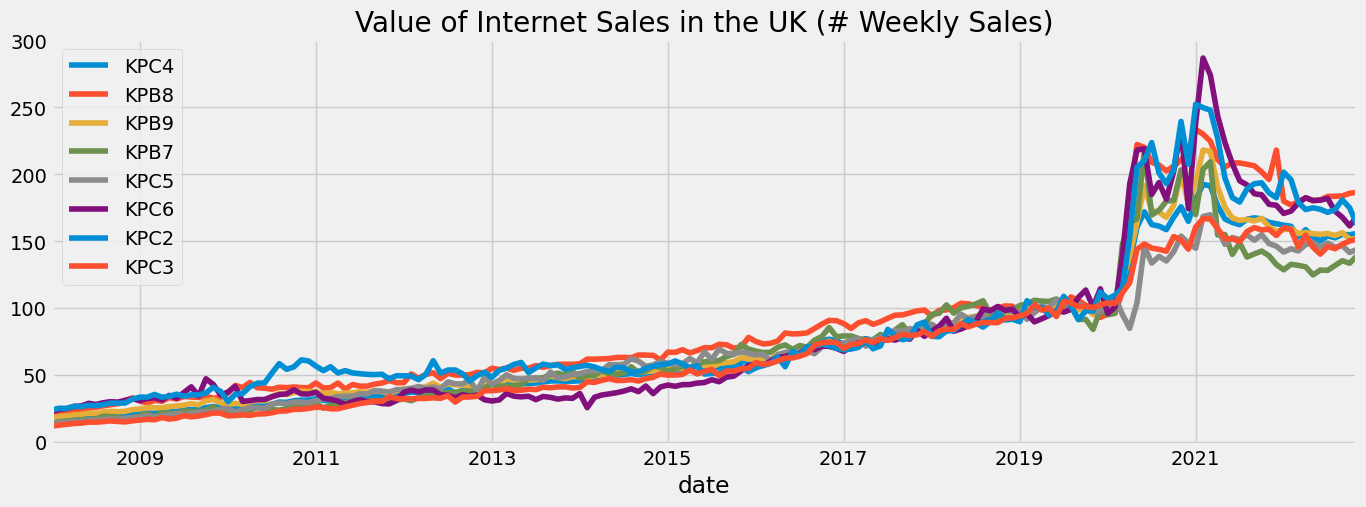

In [10]:
color_pal = sns.color_palette()
df[['KPC4', 'KPB8', 'KPB9', 'KPB7', 'KPC5', 'KPC6', 'KPC2', 'KPC3']].plot(
    style='-', figsize=(15,5), title='Value of Internet Sales in the UK (# Weekly Sales)')
plt.show()

We explore their behaviour in monthly terms.

In [11]:
time_ = df.index.month

time_ = pd.Series(time_, index=df.index)

Text(0, 0.5, '# Weekly Sales')

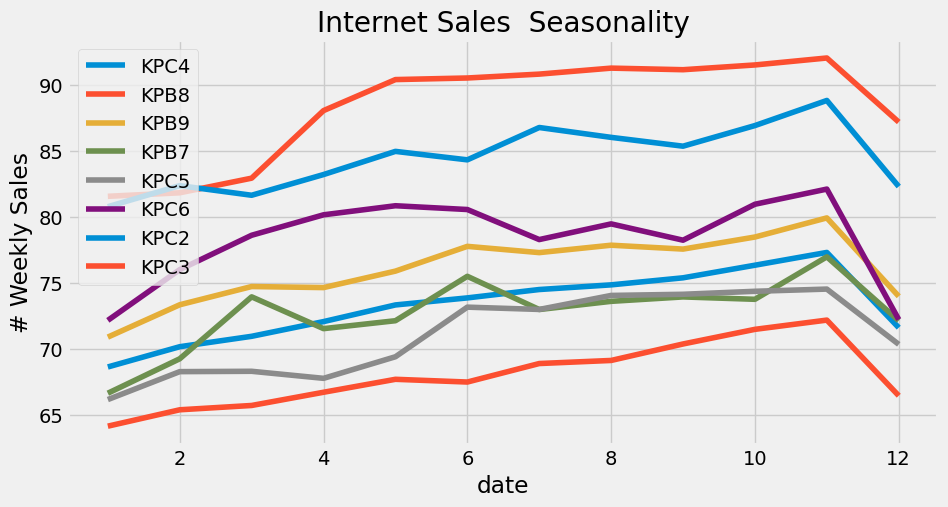

In [12]:
df.groupby(time_)[['KPC4', 'KPB8', 'KPB9', 'KPB7', 'KPC5', 'KPC6', 'KPC2', 'KPC3']].mean().plot(figsize=(10, 5))
plt.title("Internet Sales  Seasonality")
plt.ylabel("Month")
plt.ylabel("# Weekly Sales")

### Exploratory Data Analysis

#### A) Trend Decomposition for Seasonality

The data will be decomposed into some components in the signal with the built-in functionality in `statsmodels`:

    1) Trends : An entire movement of a time series (upward/downward).
    2) Seasonality : a periodic pattern that closely resembles harmonic wave.
    3) Residual : outlier/missing values.

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

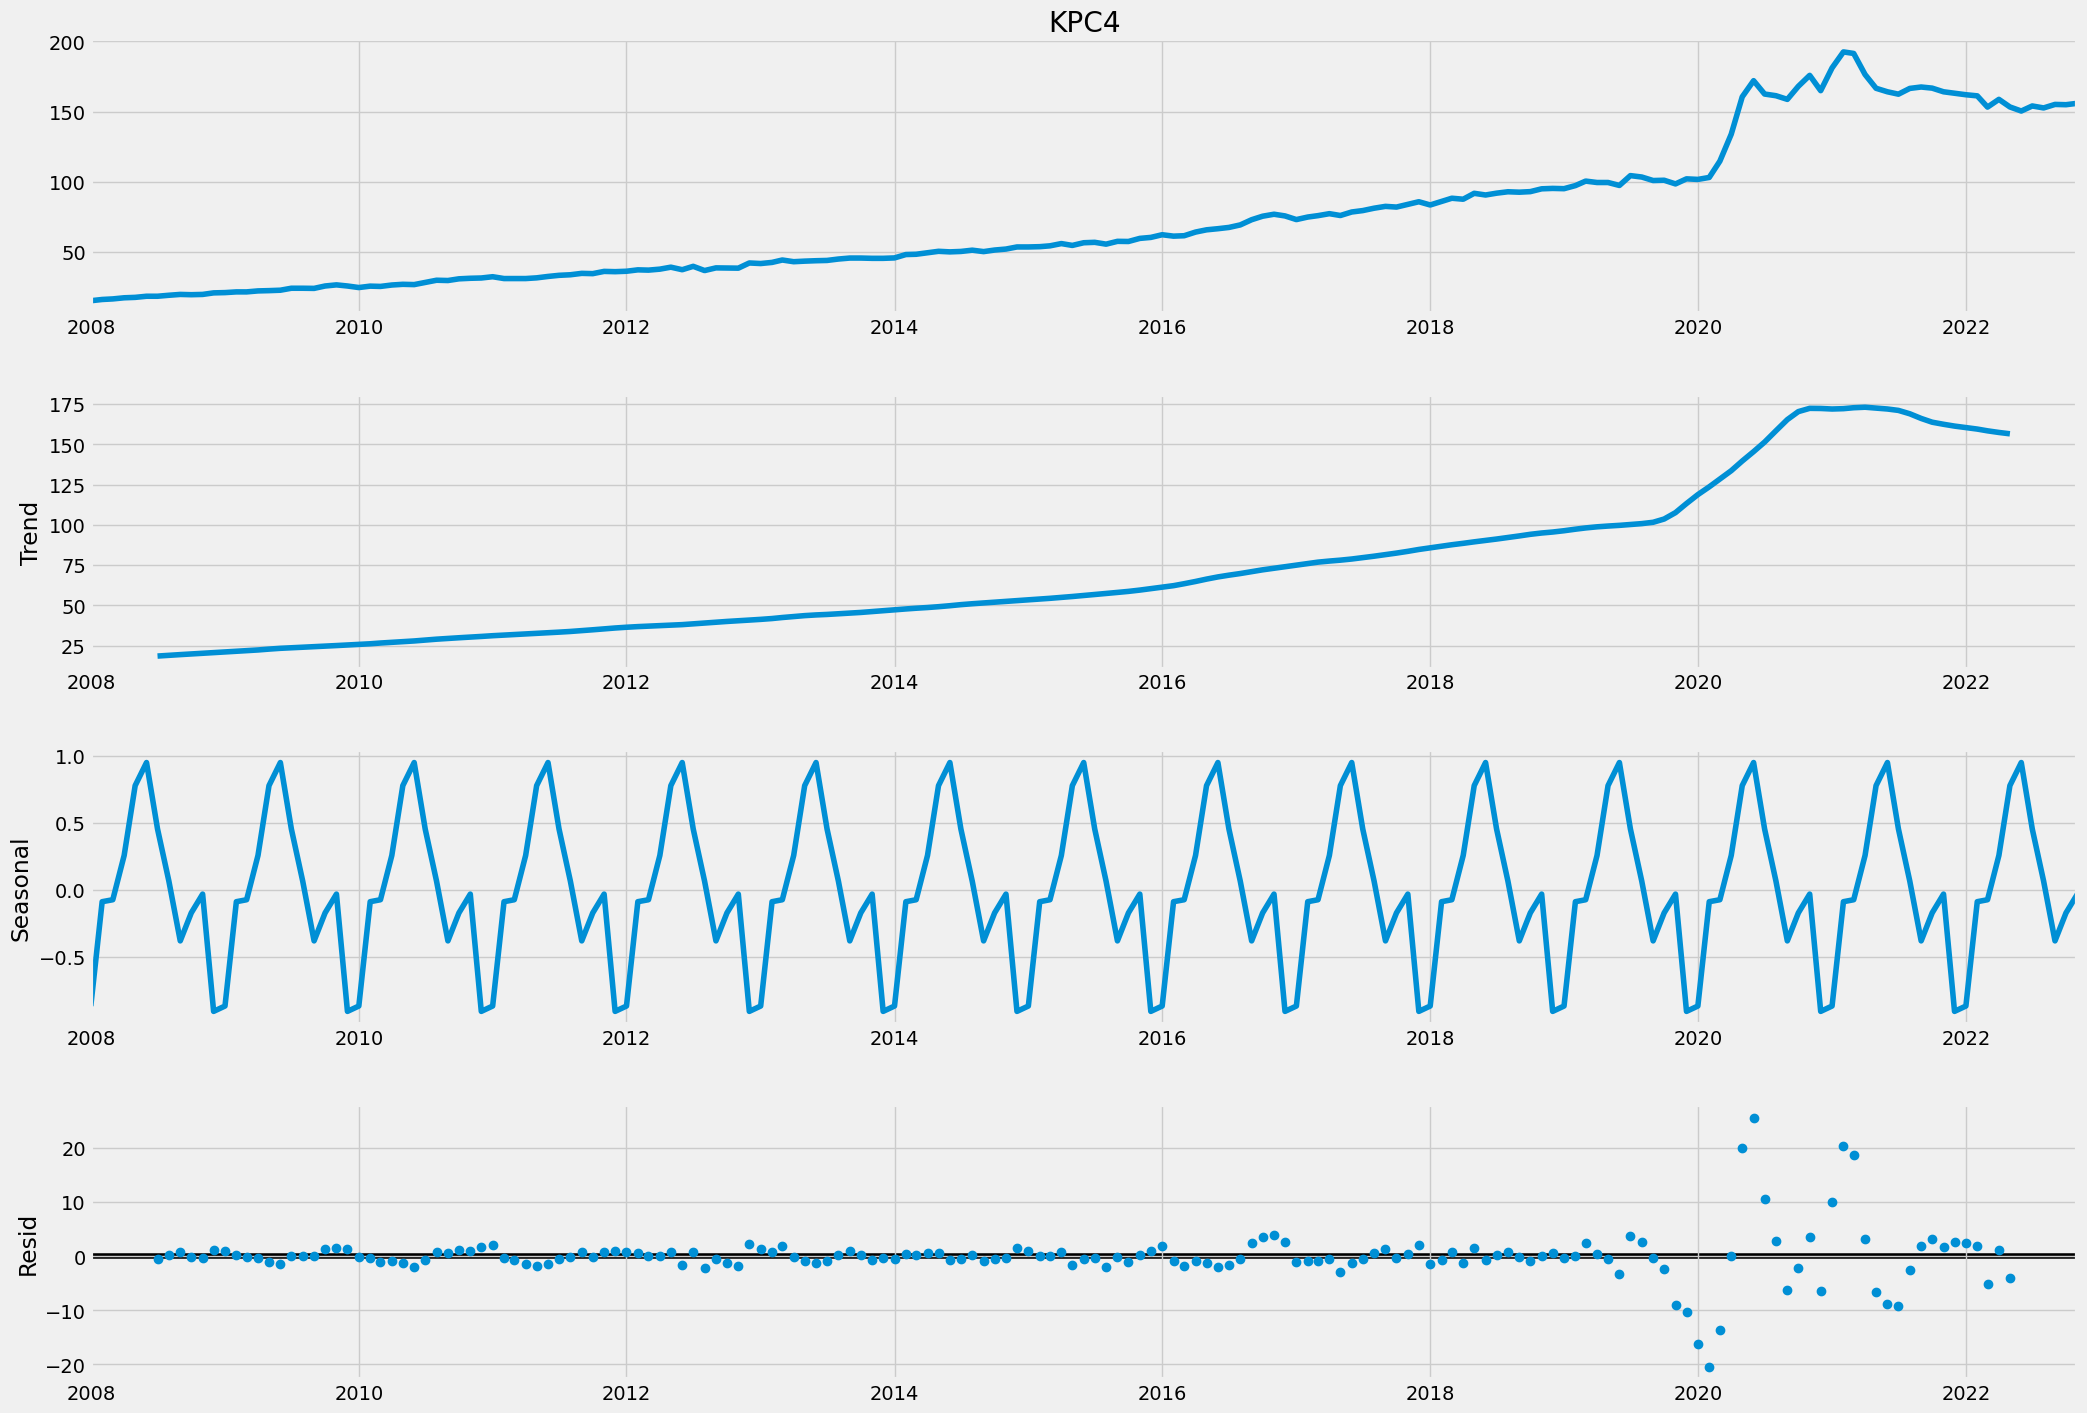

In [39]:
# Now, for decomposition...
variable = ["KPC4", "KPB8"]
    
plt.rcParams["figure.figsize"] = (12,9)
# seasonal decomposition of KPC4 with the adfuller lag value of 12
decomposed_trends = seasonal_decompose(df['KPC4'], period=12)
trend_plot = decomposed_trends.plot()
trend_plot.set_size_inches((22, 15))
plt.show() 

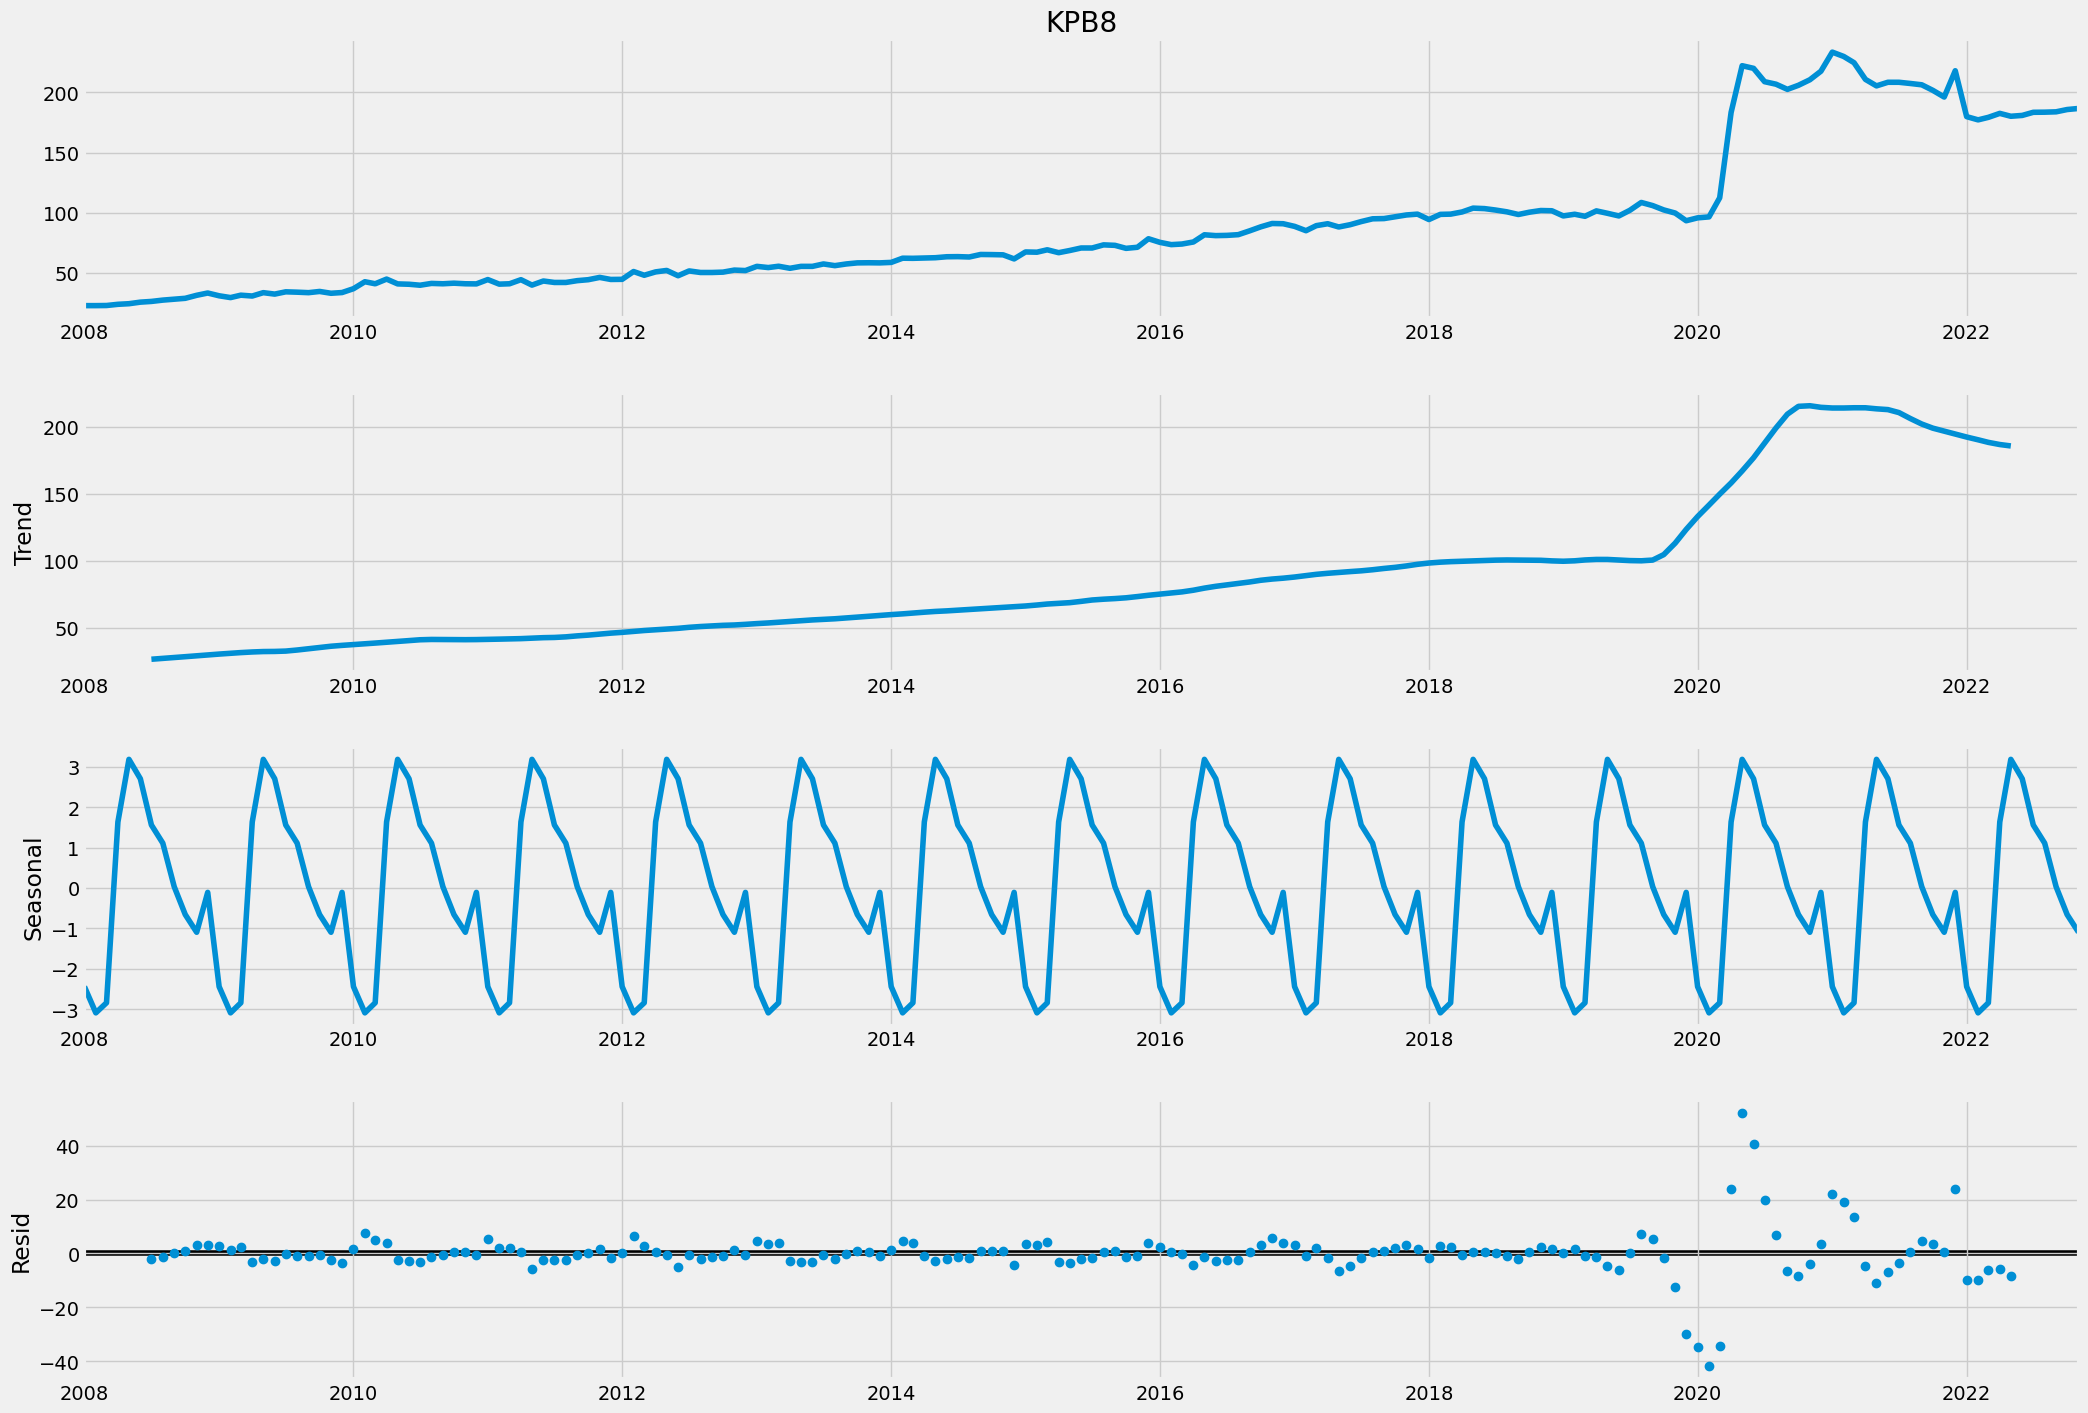

In [40]:
# seasonal decomposition of KPC4 with the adfuller lag value of 12
decomposed_trends = seasonal_decompose(df['KPB8'], period=12)
trend_plot = decomposed_trends.plot()
trend_plot.set_size_inches((22, 15))
plt.show() 

Both trends show seasonality which are closely matched to the repeated pattern in the data. However, visuals of residuals locate much higher magnitude of randomness between year 2020 and 2022.  

#### B) Moving Average Trend with 2-sigma Error 

To better visualize the trend line in general, we apply a smoothing function utilizing to the raw data trend. Smoothing function gives valuable inputs about means and variance centering around the line. In case that there are signs of instability in the variance over time, our options in selecting algorithms with higher probability of success become more apparent.

Rolling period is set to 3 (that means we perform averaging across three consecutive values for each passing three months).

In [44]:
def moving_average_trend(time_series, title):
    rolling_average = time_series.rolling(3, 
        center=False).mean() 
    rolling_std = time_series.rolling(3, center=False).std()
    plt.plot(time_series, color='darkblue', label='Monthly Sales')
    plt.plot(rolling_average, color='red', label='Rolling Average') 
    plt.plot(rolling_average + (2 * rolling_std), color='green', linestyle='-.', 
        label='Rolling 2 sigma')
    plt.plot(rolling_average - (2 * rolling_std), color='green', linestyle='-.')
    plt.legend(loc='best')
    plt.title(title) 
    plt.show() 

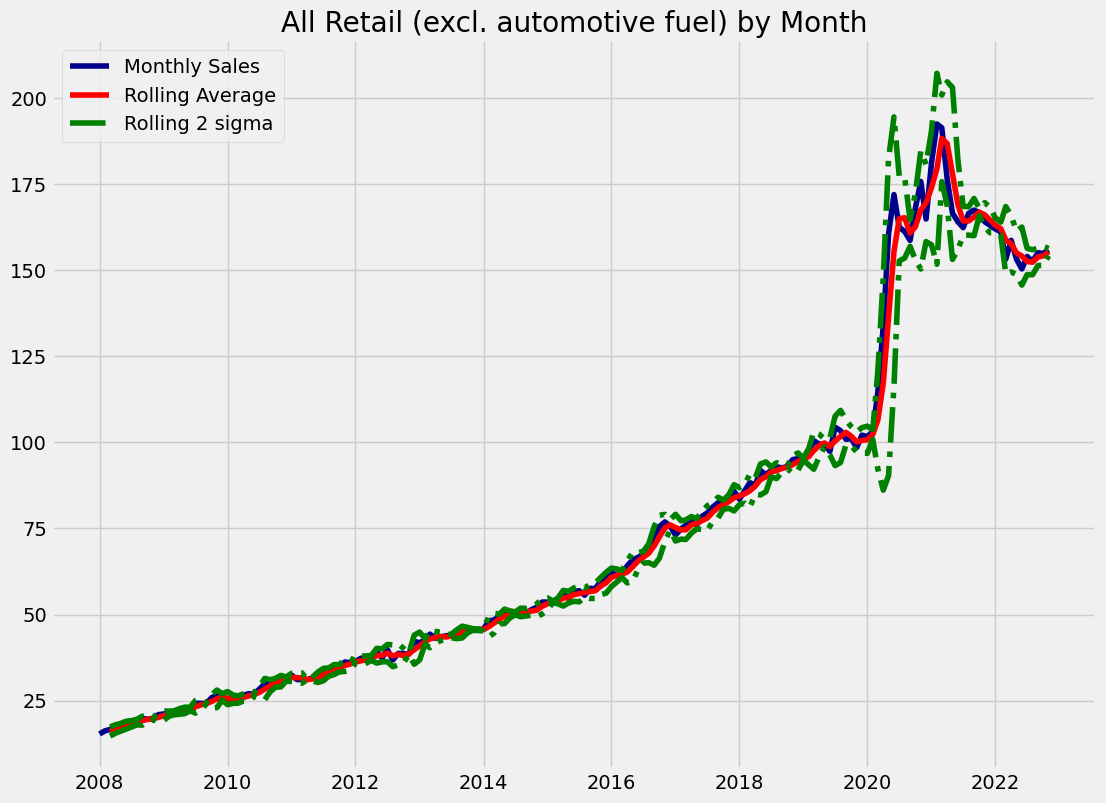

In [45]:
moving_average_trend(df['KPC4'], 'All Retail (excl. automotive fuel) by Month')

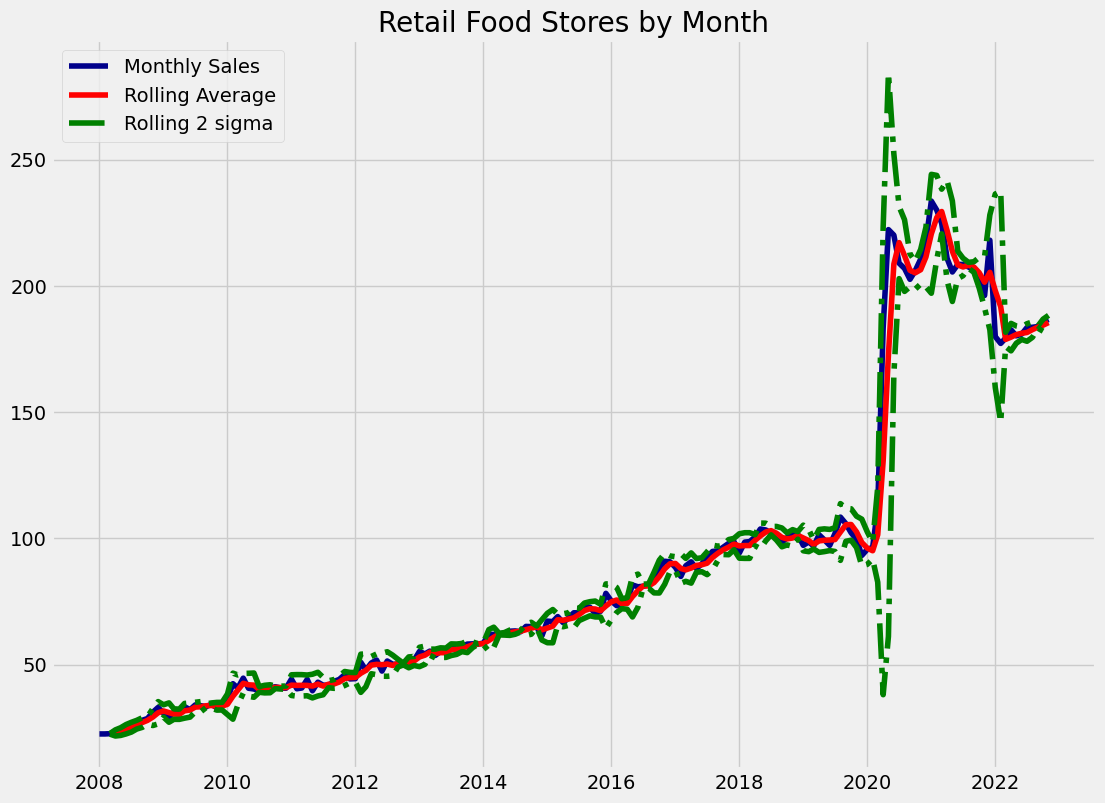

In [46]:
moving_average_trend(df['KPB8'], 'Retail Food Stores by Month')

#### C) Stationary Test with Dickey-Fuller

To test whether the trend is indeed stationary , an augmented Dickey-Fuller stationarity test from `statsmodels` is used to inform us whether we need to provide stationarity adjustment to the time series for models which are incapable of dealing with nonstationary behaviour.

This test is performed in two information correction settings: `Bayesian Information Criterion (BIC)` and `Akaike Information Criterion (AIC)`.

In [49]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_test(series, autolag):
    dickey_fuller_test = adfuller(series, autolag=autolag)
    test_items = dickey_fuller_test[:4] 
    report_items = test_items + (("not " if test_items[1] > 0.05 else "") + 
        "stationary",) 
    df_report = pd.Series(report_items, index=['Test Statistic', 'p-value', 
        '# Lags', '# Observations', 'Stationarity Test']) 

    for k, v in dickey_fuller_test[4].items(): 
        df_report['Critical Value(%s)' % k] = v

    print(df_report)

In [50]:
dickey_fuller_test(df['KPC4'], 'AIC')

Test Statistic               0.031055
p-value                      0.961026
# Lags                             12
# Observations                    166
Stationarity Test      not stationary
Critical Value(1%)           -3.47037
Critical Value(5%)          -2.879114
Critical Value(10%)         -2.576139
dtype: object


In [51]:
dickey_fuller_test(df['KPC4'], 'BIC')

Test Statistic              -0.272529
p-value                      0.929306
# Lags                              1
# Observations                    177
Stationarity Test      not stationary
Critical Value(1%)          -3.467845
Critical Value(5%)          -2.878012
Critical Value(10%)         -2.575551
dtype: object


In [52]:
dickey_fuller_test(df['KPB8'], 'AIC')

Test Statistic              -0.858956
p-value                      0.801188
# Lags                              1
# Observations                    177
Stationarity Test      not stationary
Critical Value(1%)          -3.467845
Critical Value(5%)          -2.878012
Critical Value(10%)         -2.575551
dtype: object


In [53]:
dickey_fuller_test(df['KPB8'], 'BIC')

Test Statistic              -0.858956
p-value                      0.801188
# Lags                              1
# Observations                    177
Stationarity Test      not stationary
Critical Value(1%)          -3.467845
Critical Value(5%)          -2.878012
Critical Value(10%)         -2.575551
dtype: object


Negative values on critical values on three different sets are absolute. In view of statistics, when the test statistic is less than critical values, the series is indeed stationary. As all of such values are higher than the critical values, `p-value` outputs are marked below 0.95, telling us that two trends are nonstationary (Reflecting to null hypothesis `H0` of the adfuller test the time series is nonstationary). 

#### D) Autocorrelation

To measure the relationship between values of current time point to the lagging point, autocorrelation gives a snapshot of time series with summaries of Pearson's test between the series and lagged values of the same series with values between -1 and +1 indicating the relative correlation between lags.

Partial autocorrelation is also provided to fill the gap left by autocorrelation.

In [58]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def autocorr(series, lags):
    fig, axes = plt.subplots(2, 1, figsize=(8,12))
    fig = plot_acf(series, lags=lags, ax=axes[0])
    fig = plot_pacf(series, lags=lags, ax=axes[1])
    axes[0].set_xlabel('lags')
    axes[0].set_ylabel('correlation')
    axes[1].set_xlabel('lags')
    axes[1].set_ylabel('correlation')
    plt.show()

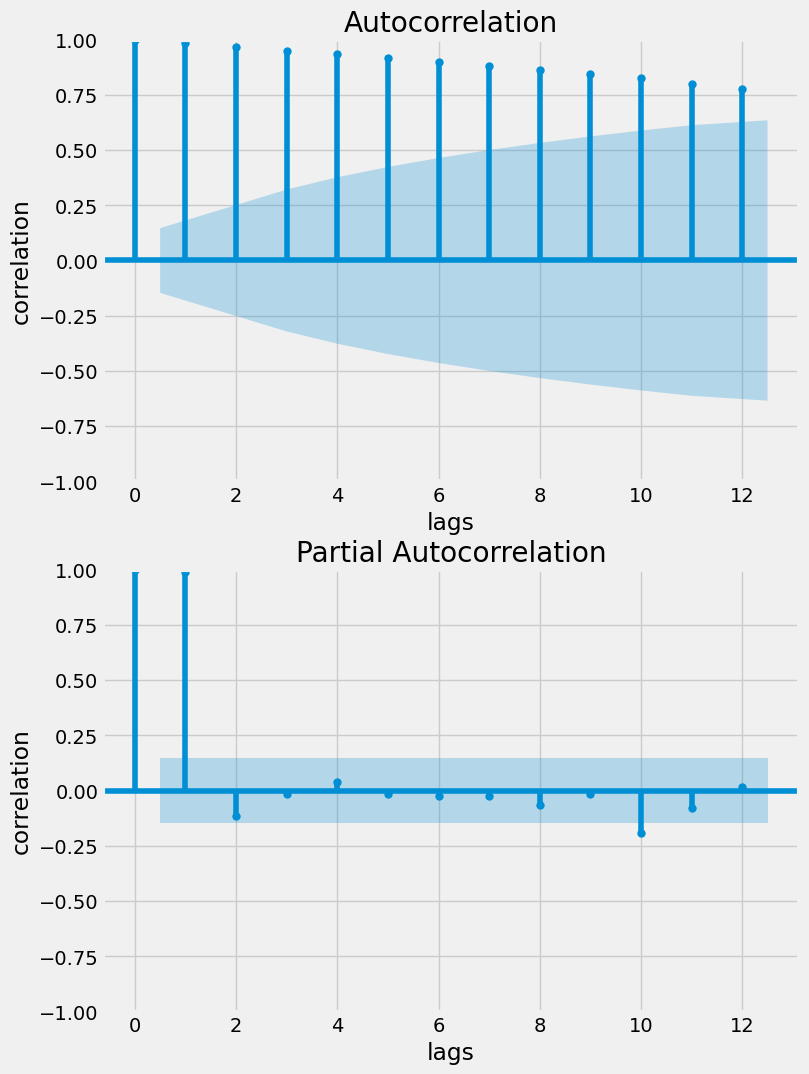

In [62]:
autocorr(df['KPC4'], 12)

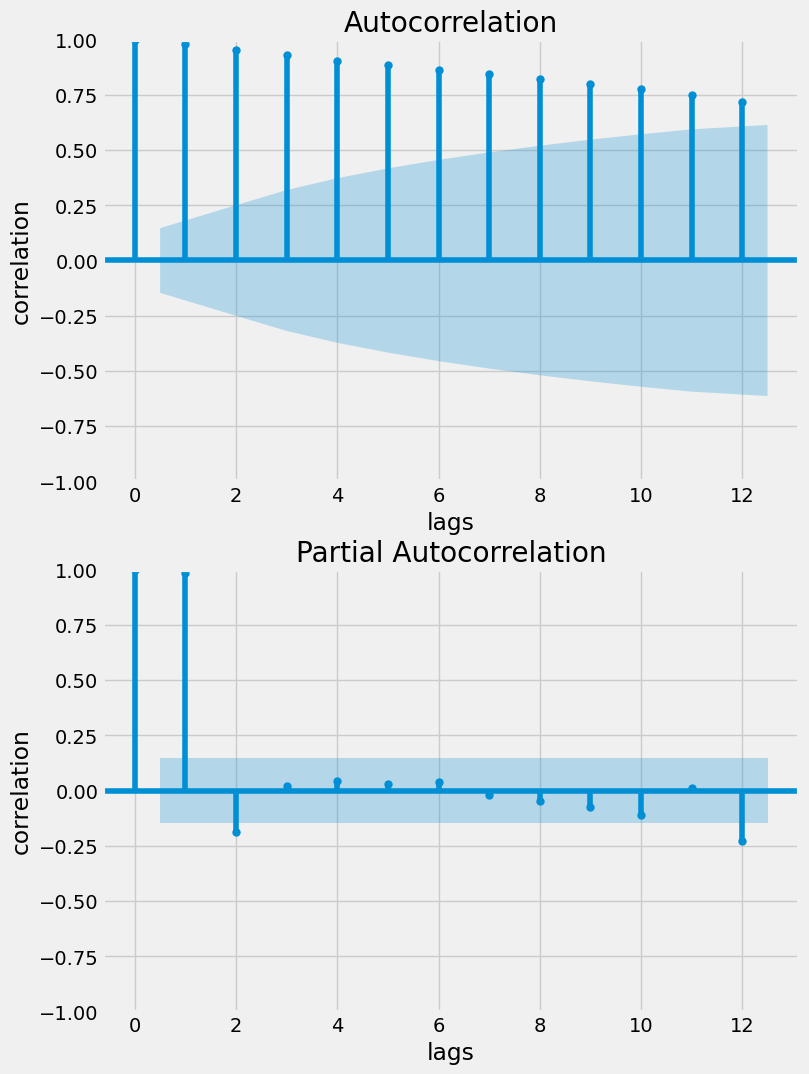

In [63]:
autocorr(df['KPB8'], 12)

#### E) Outlier



In [70]:
from statsmodels.tsa.seasonal import STL

# Apply STL decomposition
res = STL(df["KPC4"], robust=True).fit()
seasonal_component = res.seasonal
df_deseasoned = (df["KPC4"] - seasonal_component).to_frame("y")

df_ = df_deseasoned.copy()

def outlier_mean(df_, window, factor, inputs):
    # Compute yhat using a rolling mean and the rolling standard deviation which will be used as
    # part of the threshold
    df_rolling_stats = (
        df_["y"]
        .rolling(
            window=window,  # A window of 12 is chosen to average over yearly seasonality
            center=True,  # Use a centered window for the mean
            min_periods=1,
        )  # Min periods set to 1 so that edge cases also have estimates
        .agg({"rolling_mean": "mean", "rolling_std": "std"})
    )


    df_[["rolling_mean", "rolling_std"]] = df_rolling_stats

    # Apply the threshold criteria to identify an outlier
    factor = factor
    df_["is_outlier"] = np.abs(df_["y"] - df_["rolling_mean"]) > factor * df_["rolling_std"]

    df_.head()

    ### Rolling Mean
    # Compute the upper and lower boundary of the threshold for plotting
    df_["upper"] = df_["rolling_mean"] + factor * df_["rolling_std"]
    df_["lower"] = df_["rolling_mean"] - factor * df_["rolling_std"]

    # Plot
    fig, ax = plt.subplots(figsize=[10, 5])
    df_.plot(y=["y", "rolling_mean"], marker=".", ax=ax)
    df_.plot(
        y=["upper", "lower"], figsize=[10, 5], ax=ax, color="k", alpha=0.2, legend=None
    )

    # If any data points are identified as outlier, plot them
    if df_["is_outlier"].any():
        df_["y"].loc[df_["is_outlier"]].plot(
            marker="o", color="r", ax=ax, legend=None, linestyle=""
        )

    ax.set_title(f"{inputs} deseasonalised with outliers")
    ax.set_ylabel(f"Retail Sales deseasonalised")
    ax.set_xlabel("Time")


### Rolling Median
def outlier_median(df_, window, factor, inputs):
    median_absolute_deviation = lambda y: np.median(np.abs(y - np.median(y)))
    df_ = df_deseasoned.copy()
    df_rolling_stats = (
        df_["y"]
        .rolling(
            window=window,  # A window of 12 is chosen to average over yearly seasonality
            center=True,  # Use a centered window for the mean
            min_periods=1,
        )  # Min periods set to 1 so that edge cases also have estimates
        .agg({"rolling_median": "median", "rolling_MAD": median_absolute_deviation})
    )

    df_[["rolling_median", "rolling_MAD"]] = df_rolling_stats

    # Apply the threshold criteria to identify an outlier
    factor = factor
    df_["is_outlier"] = (
        np.abs(df_["y"] - df_["rolling_median"]) > factor * df_["rolling_MAD"]
    )

    df_.head()

    # Compute the upper and lower boundary of the threshold for plotting
    df_["upper"] = df_["rolling_median"] + factor * df_["rolling_MAD"]
    df_["lower"] = df_["rolling_median"] - factor * df_["rolling_MAD"]

    # Plot
    fig, ax = plt.subplots(figsize=[10, 5])
    df_.plot(y=["y", "rolling_median"], marker=".", ax=ax)
    df_.plot(
        y=["upper", "lower"], figsize=[10, 5], ax=ax, color="k", alpha=0.2, legend=None
    )

    # If any data points are identified as outliers, plot them
    if df_["is_outlier"].any():
        df_["y"].loc[df_["is_outlier"]].plot(
            marker="o", color="r", ax=ax, legend=None, linestyle=""
        )

    ax.set_title(f"{inputs} deseasonalised with outliers")
    ax.set_ylabel("Retail Sales deseasonalised")
    ax.set_xlabel("Time")

In [71]:
df_.head()

,y
date,
2008-01-01,15.992429
2008-02-01,16.511887
2008-03-01,17.091686
2008-04-01,17.465133
2008-05-01,17.978186


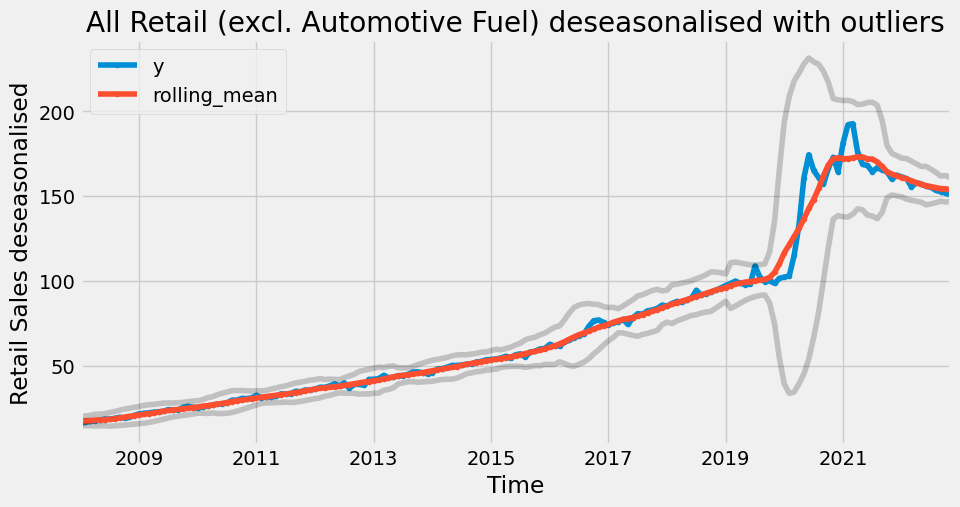

In [72]:
outlier_mean(df_, 12, 3, "All Retail (excl. Automotive Fuel)")

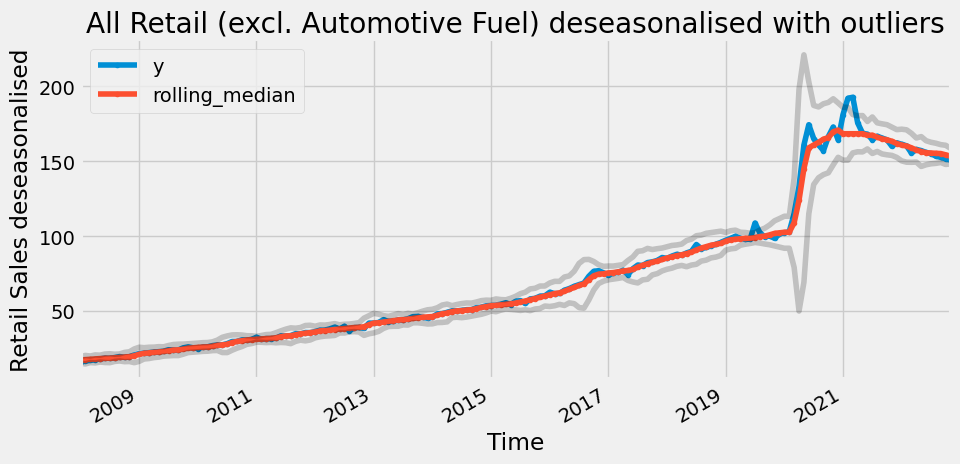

In [73]:
outlier_median(df_, 12, 3, "All Retail (excl. Automotive Fuel)")

In [74]:
res = STL(df["KPB8"], robust=True).fit()
seasonal_component = res.seasonal
df_deseasoned = (df["KPB8"] - seasonal_component).to_frame("y")

df_ = df_deseasoned.copy()

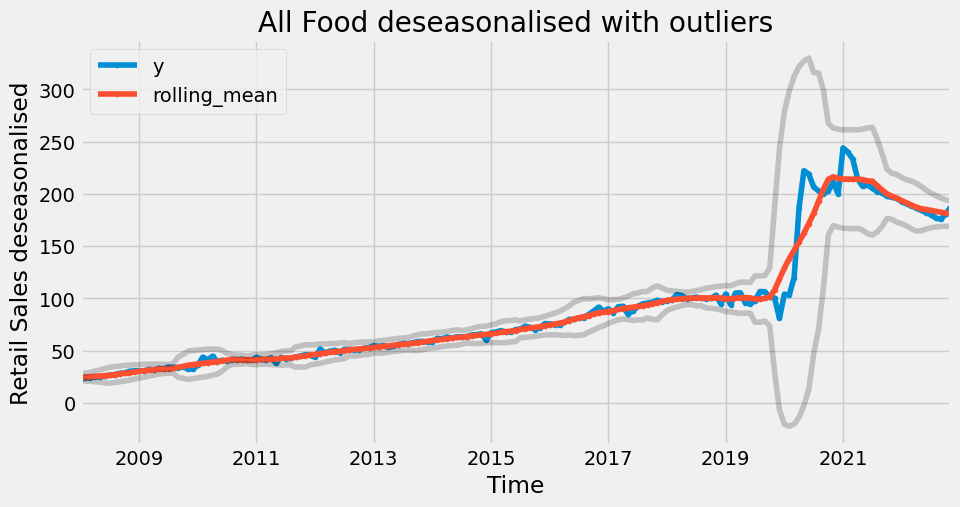

In [75]:
outlier_mean(df_, 12, 3, "All Food")

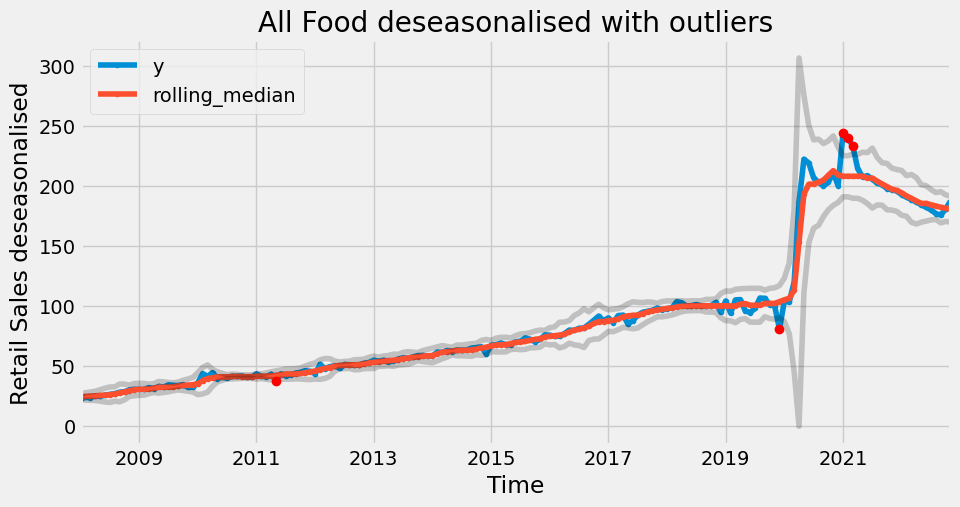

In [76]:
outlier_median(df_, 12, 3, "All Food")

This preparation work prior to model fitting holds an importance in informing our testing: guiding the testing to the point that we can iterate on experiment at a faster rate, hence getting to reliable answer with a possible minimum amount of time.

### Feature Engineering

In our effort to build machine learning able to produce accountable prediction after capturing mapping inputs, many suggestions come around that feature engineering takes domain knowledge as references in extracting features from raw data. This purpose is to improve the data quality that machine learning can give much better prediction in comparison with feeding only the raw data to the predictive model.

We will explore and apply two most common techniques for time series: lag and window features.

In [13]:
def create_features(df):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week

    
    return df

In [14]:
# raw time series
variables = ["KPC4", "KPB8"]

df_modified = create_features(df[variables])
df_modified.head()

,KPC4,KPB8,dayofweek,quarter,dayofyear,dayofmonth,weekofyear
date,,,,,,,
2008-01-01,15.3,22.5,1,1,1,1,1
2008-02-01,16.2,22.5,4,1,32,1,5
2008-03-01,16.6,22.6,5,1,61,1,9
2008-04-01,17.4,23.6,1,2,92,1,14
2008-05-01,17.7,24.1,3,2,122,1,18


#### A) Lag Features

Row lagging is performed by shifting date in four periods: 1, 3, 6, and 12 months.

In [15]:
# Shift the data forward 1 month.
tmp = df_modified[variables].shift(periods=1)
# Move forward 3 months.
tmp_3 = df_modified[variables].shift(periods=3)
# Move forward 6 months.
tmp_6 = df_modified[variables].shift(periods=6)
# Move forward 12 months.
tmp_12 = df_modified[variables].shift(periods=12)
# Names for the new variables.
tmp.columns = [v + "_lag_1M" for v in variables]
# Rename the variables.
tmp_3.columns = [v + "_lag_3M" for v in variables]
# Rename the variables.
tmp_6.columns = [v + "_lag_6M" for v in variables]
# Rename the variables.
tmp_12.columns = [v + "_lag_12M" for v in variables]

In [16]:
df_modified = df_modified.merge(tmp, left_index=True, right_index=True, how="left")
df_modified = df_modified.merge(tmp_3, left_index=True, right_index=True, how="left")
df_modified = df_modified.merge(tmp_6, left_index=True, right_index=True, how="left")
df_modified = df_modified.merge(tmp_12, left_index=True, right_index=True, how="left")

In [17]:
df_modified[["KPC4","KPC4_lag_1M","KPC4_lag_3M",
                  "KPC4_lag_6M","KPC4_lag_12M"]].head(13)

,KPC4,KPC4_lag_1M,KPC4_lag_3M,KPC4_lag_6M,KPC4_lag_12M
date,,,,,
2008-01-01,15.3,NaN,NaN,NaN,NaN
2008-02-01,16.2,15.3,NaN,NaN,NaN
2008-03-01,16.6,16.2,NaN,NaN,NaN
2008-04-01,17.4,16.6,15.3,NaN,NaN
2008-05-01,17.7,17.4,16.2,NaN,NaN
2008-06-01,18.5,17.7,16.6,NaN,NaN
2008-07-01,18.5,18.5,17.4,15.3,NaN
2008-08-01,19.2,18.5,17.7,16.2,NaN
2008-09-01,19.8,19.2,18.5,16.6,NaN


#### B) Window Features

Window features is performed by shifting date in two periods: 3 and 6 months. 

To make this process more automated and cohesive, module `feature_engine` is used here.

In [18]:
# Create a custom metric for the Median Absolute Deviation
def mad(x):
    return np.median(np.abs(x - np.median(x)))

In [34]:
df_copy = df_modified.copy()

df_copy = df_copy[variables]

result = (
    df_copy["KPC4"]
    .rolling(window=3, min_periods=1)
    .agg(["mean", "std", mad]) # Pick statistics.
    .shift(periods=1)  # Move the average 1 month forward
)  

result = result.add_prefix("KPC4_window_3_")

In [35]:
df_copy = df_copy.join(result, how="left")
df_copy

,KPC4,KPB8,KPC4_window_3_mean,KPC4_window_3_std,KPC4_window_3_mad
date,,,,,
2008-01-01,15.3,22.5,NaN,NaN,NaN
2008-02-01,16.2,22.5,15.300000,NaN,0.00
2008-03-01,16.6,22.6,15.750000,0.636396,0.45
2008-04-01,17.4,23.6,16.033333,0.665833,0.40
2008-05-01,17.7,24.1,16.733333,0.611010,0.40
...,...,...,...,...,...
2022-07-01,154.0,183.5,154.133333,4.212284,2.90
2022-08-01,152.6,183.6,152.566667,1.908752,0.70
2022-09-01,155.1,183.9,152.333333,1.814754,1.40


In [51]:
df_modified = df_modified.drop(columns=["KPC4_lag_1M",
                                        "KPB8_lag_1M",
                                        "KPC4_lag_3M",
                                        "KPB8_lag_3M",
                                        "KPC4_lag_6M",
                                        "KPB8_lag_6M",
                                        "KPC4_lag_12M",
                                        "KPB8_lag_12M"], axis=1)

In [52]:
from feature_engine.timeseries.forecasting import LagFeatures, WindowFeatures
from feature_engine.imputation import DropMissingData
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
lag_transformer = LagFeatures(variables=variables,
                              periods=[1,3,6,12])

window_transformer = WindowFeatures(
    variables=variables,
    functions=["mean", "std"],
    min_periods=1,
    window=[3,6],
)


imputer = DropMissingData()

In [54]:
pipe = Pipeline(
    [
        ("lag", lag_transformer),
        ("rolling", window_transformer),
        ("drop_missing", imputer)
    ]
)

df_transformed = pipe.fit_transform(df_modified)

In [55]:
df_transformed

,KPC4,KPB8,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,KPC4_lag_1,KPB8_lag_1,KPC4_lag_3,...,KPC4_lag_12,KPB8_lag_12,KPC4_window_3_mean,KPC4_window_3_std,KPB8_window_3_mean,KPB8_window_3_std,KPC4_window_6_mean,KPC4_window_6_std,KPB8_window_6_mean,KPB8_window_6_std
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,21.1,30.7,3,1,1,1,1,20.9,33.0,19.6,...,15.3,22.5,20.100000,0.700000,30.900000,2.206808,19.633333,0.791623,28.950000,2.622022
2009-02-01,21.6,29.2,6,1,32,1,5,21.1,30.7,19.8,...,16.2,22.5,20.600000,0.700000,31.600000,1.228821,20.066667,0.758068,29.733333,2.238452
2009-03-01,21.6,31.2,6,1,60,1,9,21.6,29.2,20.9,...,16.6,22.6,21.200000,0.360555,30.966667,1.913984,20.466667,0.838252,30.083333,1.879805
2009-04-01,22.3,30.5,2,2,91,1,14,21.6,31.2,21.1,...,17.4,23.6,21.433333,0.288675,30.366667,1.040833,20.766667,0.873308,30.633333,1.570563
2009-05-01,22.5,33.3,4,2,121,1,18,22.3,30.5,21.6,...,17.7,24.1,21.833333,0.404145,30.300000,1.014889,21.216667,0.847152,30.950000,1.234099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,154.0,183.5,4,3,182,1,26,150.4,180.9,158.7,...,162.4,208.5,154.133333,4.212284,181.233333,1.234234,156.466667,4.806523,180.016667,1.785964
2022-08-01,152.6,183.6,0,3,213,1,31,154.0,183.5,153.3,...,166.5,207.5,152.566667,1.908752,181.533333,1.738774,155.133333,4.007826,180.616667,2.276327
2022-09-01,155.1,183.9,3,3,244,1,35,152.6,183.6,150.4,...,167.5,206.4,152.333333,1.814754,182.666667,1.530795,153.700000,2.742262,181.683333,1.806008


### Feature Selection with Lasso

In [80]:
split_date = "2019-06-01"
train = df_transformed.loc[df_transformed.index < split_date]
test = df_transformed.loc[df_transformed.index >= split_date]

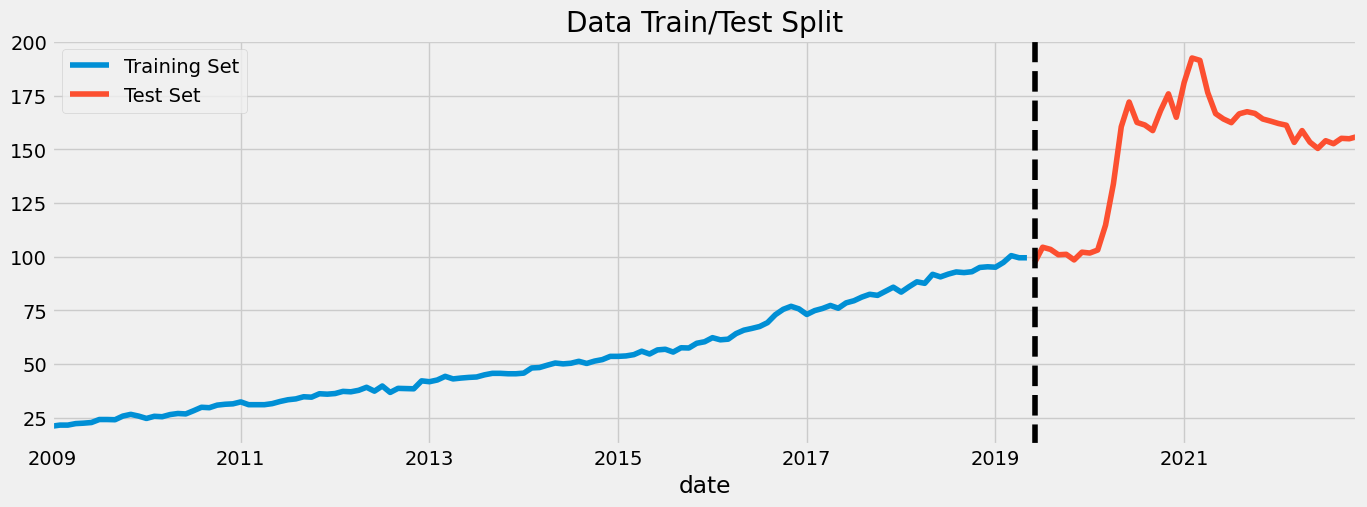

In [81]:
fig, ax = plt.subplots(figsize=(15, 5))
train['KPC4'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['KPC4'].plot(ax=ax, label='Test Set')
ax.axvline('06-01-2019', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

### On KPC4

In [82]:
X_train = train.drop(columns=['KPB8','KPB8_lag_1', 'KPB8_lag_3',
                            'KPB8_lag_6', 'KPB8_lag_12',
                            'KPB8_window_3_mean', 'KPB8_window_3_std',
                            'KPB8_window_6_mean', 'KPB8_window_6_std'], axis=1)
X_test = test.drop(columns=['KPB8','KPB8_lag_1', 'KPB8_lag_3',
                          'KPB8_lag_6', 'KPB8_lag_12',
                          'KPB8_window_3_mean','KPB8_window_3_std',
                          'KPB8_window_6_mean', 'KPB8_window_6_std'], axis=1)

# the target variable
y_train = train["KPC4"].copy()
y_test = test["KPC4"].copy()

# remove raw time series from predictors set
train = train.drop("KPC4", axis=1)
test = test.drop("KPC4", axis=1)

In [83]:
X_train_ = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)

In [84]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=1, random_state=0)

In [85]:
feature_importances = pd.Series(index=X_train.columns, data=model.coef_)

feature_importances.abs().sort_values(ascending=False)

KPC4                  21.919449
dayofweek              0.000000
quarter                0.000000
dayofyear              0.000000
dayofmonth             0.000000
weekofyear             0.000000
KPC4_lag_1             0.000000
KPC4_lag_3             0.000000
KPC4_lag_6             0.000000
KPC4_lag_12            0.000000
KPC4_window_3_mean     0.000000
KPC4_window_3_std      0.000000
KPC4_window_6_mean     0.000000
KPC4_window_6_std      0.000000
dtype: float64

### On KPB8

In [86]:
X_train = train.drop(columns=['KPC4_lag_1', 'KPC4_lag_3',
                            'KPC4_lag_6', 'KPC4_lag_12',
                            'KPC4_window_3_mean', 'KPC4_window_3_std',
                            'KPC4_window_6_mean', 'KPC4_window_6_std'], axis=1)
X_test = test.drop(columns=['KPC4_lag_1', 'KPC4_lag_3',
                            'KPC4_lag_6', 'KPC4_lag_12',
                            'KPC4_window_3_mean', 'KPC4_window_3_std',
                            'KPC4_window_6_mean', 'KPC4_window_6_std'], axis=1)

# the target variable
y_train = train["KPB8"].copy()
y_test = test["KPB8"].copy()

# remove raw time series from predictors set
train = train.drop("KPB8", axis=1)
test = test.drop("KPB8", axis=1)

In [87]:
X_train_ = StandardScaler().fit_transform(X_train)
X_train = pd.DataFrame(data=X_train_, columns=X_train.columns)

In [88]:
model = Lasso(alpha=1, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=1, random_state=0)

In [89]:
feature_importances = pd.Series(index=X_train.columns, data=model.coef_)

feature_importances.abs().sort_values(ascending=False)

KPB8                  21.561493
dayofweek              0.000000
quarter                0.000000
dayofyear              0.000000
dayofmonth             0.000000
weekofyear             0.000000
KPB8_lag_1             0.000000
KPB8_lag_3             0.000000
KPB8_lag_6             0.000000
KPB8_lag_12            0.000000
KPB8_window_3_mean     0.000000
KPB8_window_3_std      0.000000
KPB8_window_6_mean     0.000000
KPB8_window_6_std      0.000000
dtype: float64

In [90]:
df_transformed.head()

,KPC4,KPB8,dayofweek,quarter,dayofyear,dayofmonth,weekofyear,KPC4_lag_1,KPB8_lag_1,KPC4_lag_3,...,KPC4_lag_12,KPB8_lag_12,KPC4_window_3_mean,KPC4_window_3_std,KPB8_window_3_mean,KPB8_window_3_std,KPC4_window_6_mean,KPC4_window_6_std,KPB8_window_6_mean,KPB8_window_6_std
date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,21.1,30.7,3,1,1,1,1,20.9,33.0,19.6,...,15.3,22.5,20.100000,0.700000,30.900000,2.206808,19.633333,0.791623,28.950000,2.622022
2009-02-01,21.6,29.2,6,1,32,1,5,21.1,30.7,19.8,...,16.2,22.5,20.600000,0.700000,31.600000,1.228821,20.066667,0.758068,29.733333,2.238452
2009-03-01,21.6,31.2,6,1,60,1,9,21.6,29.2,20.9,...,16.6,22.6,21.200000,0.360555,30.966667,1.913984,20.466667,0.838252,30.083333,1.879805
2009-04-01,22.3,30.5,2,2,91,1,14,21.6,31.2,21.1,...,17.4,23.6,21.433333,0.288675,30.366667,1.040833,20.766667,0.873308,30.633333,1.570563
2009-05-01,22.5,33.3,4,2,121,1,18,22.3,30.5,21.6,...,17.7,24.1,21.833333,0.404145,30.300000,1.014889,21.216667,0.847152,30.950000,1.234099


In [91]:
df_transformed.to_csv("Internet_sales_UK_preprocessed.csv", index=True)